In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import wfdb # MIT-BIH files

ARRYTHMIA_PATH = "data/arrythmia_rates/"
NORMAL_PATH = "data/normal_rates/"


anomalies = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

normal = ['N'] 


**N** - NORMAL, Normal beat <br>
**L** - LBBB, Left bundle branch block beat <br>
**R** - RBBB, Right bundle branch block beat <br>
**a** - ABERR, Aberrated atrial premature beat <br>
**V** - PVC, Premature ventricular contraction <br>
**F** - FUSION, Fusion of ventricular and normal beat <br>
**J** - NPC, Nodal (junctional) premature beat <br>
**A** - APC, Atrial premature contraction <br>
**S** - SVPB, Premature or ectopic supraventricular beat <br>
**E** - VESC, Ventricular escape beat <br>
**j** - NESC, Nodal (junctional) escape beat <br>
**/** - PACE, Paced beat <br>
**f** - PFUS, Fusion of paced and normal beat <br>
**e** - AESC, Atrial escape beat <br>

In [49]:
for file in os.listdir(ARRYTHMIA_PATH)[:3]:
    print(file)
    if file.endswith("atr"):
        temp = wfdb.rdann(ARRYTHMIA_PATH + file.split(".")[0], "atr", sampto=300)
    if file.endswith("dat"):
        record = wfdb.rdrecord(ARRYTHMIA_PATH + file.split(".")[0], sampto=300)

100.atr
100.dat
100.hea


I only need **MLII (Modified Lead II)** signals, because they are the most essential here.

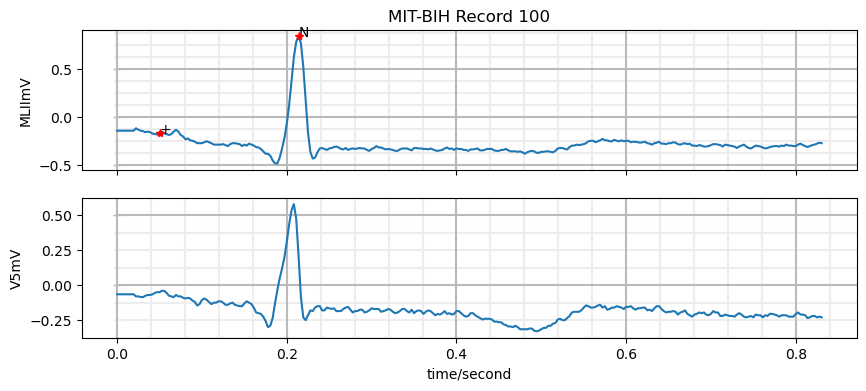

In [53]:
wfdb.plot_wfdb(record=record, annotation=temp, plot_sym=True,
                   time_units='seconds', title='MIT-BIH Record 100',
                   figsize=(10,4), ecg_grids='all')

In [81]:
record.p_signal[18]

array([-0.17, -0.05])

In [71]:
temp.sample

array([18, 77], dtype=int64)

In [156]:
def plot_signal(signal: np.array, annot_sample: int, annot_symbol: str, fs=360):
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(signal.shape[0]) / fs, signal)
    plt.plot(annot_sample / fs, signal[annot_sample], 'ro')
    plt.annotate(annot_symbol, [annot_sample / fs, signal[annot_sample]])
    plt.tight_layout()
    plt.show()

In [136]:
def load_full_ecg(path, id):
    record = wfdb.rdrecord(path + id)
    ann = wfdb.rdann(path + id, "atr")

    signal = record.p_signal[:, 0] # MLII
    ann_sample = ann.sample # annotation locations
    ann_symbol = ann.symbol # annotation symbols
    
    return signal, ann_sample, ann_symbol

In [138]:
ss, ase, asl = load_full_ecg(ARRYTHMIA_PATH, "100")

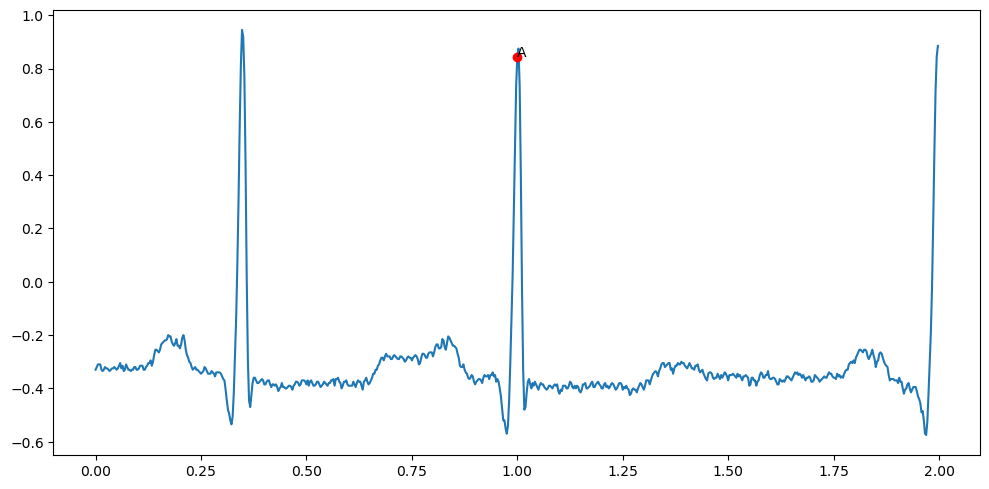

In [162]:
for smpl, symb in zip(ase, asl):
    if symb in anomalies:
        temp_signal = ss[smpl-360:smpl+360]
        plot_signal(temp_signal, 360, symb)
        break

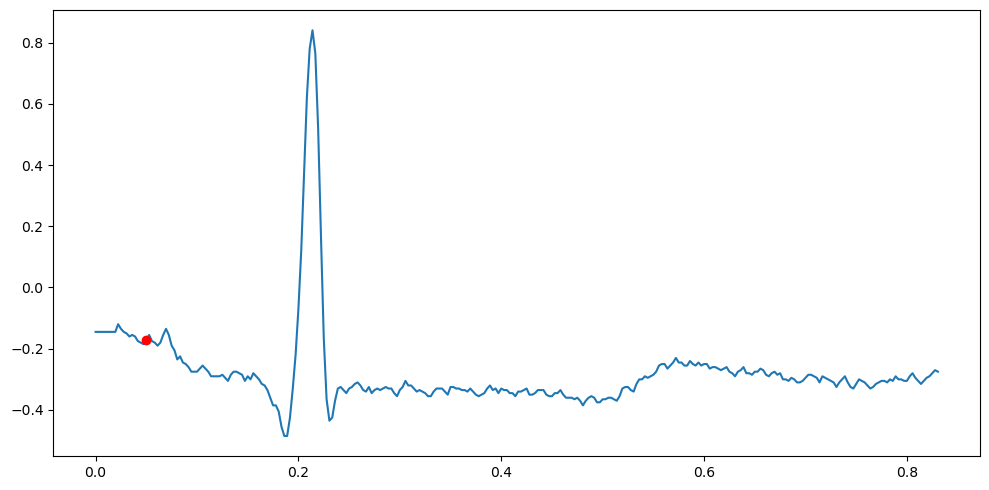

In [107]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(record.p_signal.shape[0])/record.fs, record.p_signal[:, 0])
plt.plot(temp.sample[0]/record.fs, record.p_signal[temp.sample[0]][0], 'ro')

plt.tight_layout()
plt.show()